In [57]:
#Importação das bibliotecas e pacotes necessários

import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
import cv2 
from PIL import Image

np.random.seed(42)





(60000, 28, 28)
(10000, 28, 28)


<ipython-input-58-36c308754fef>:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


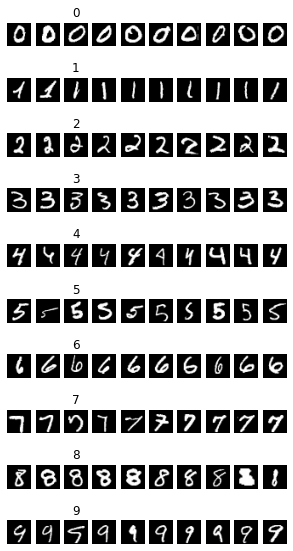

In [58]:
#Importação do conjunto de dados MNIST

(X_train, y_train), (X_test, y_test)= tf.keras.datasets.mnist.load_data()

#Verificação do shape do X_test e X_treino
print(X_train.shape)
print(X_test.shape)

n_of_samples=[]
 
n_cols = 10
n_classes = 10
 
#Vizualização do dataset
fig, axs = plt.subplots(nrows=n_classes, ncols=n_cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        n_of_samples.append(len(x_selected))
        
#Nota o Mnist é um banco de dados na qual temos varios numeros escrito a mão por pessoas diversas.

In [59]:
# Tratamento dos dados do dataset

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Conversão da saída de um número inteiro para vetor com dez posições 
y_train = tf.keras.utils.to_categorical( y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# conversão da entreada para valres entre 0 e 1 
X_train = X_train/255
X_test = X_test/255

In [60]:
# Construíndo, com auxilio da biblioteca tensorflow, a estrutura da rede
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(20, (5,5), input_shape=(28,28,1), activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(14,(3,3), activation='elu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(250, activation='elu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.compile(tf.keras.optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
# Treinamento da rede neural
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=50, verbose=1, shuffle=1)

Epoch 1/10
960/960 [==============================] - 16s 16ms/step - loss: 0.2857 - accuracy: 0.9345 - val_loss: 0.1571 - val_accuracy: 0.9707
Epoch 2/10
960/960 [==============================] - 15s 16ms/step - loss: 0.2622 - accuracy: 0.9612 - val_loss: 0.2749 - val_accuracy: 0.9682
Epoch 3/10
960/960 [==============================] - 15s 16ms/step - loss: 0.2890 - accuracy: 0.9650 - val_loss: 0.3048 - val_accuracy: 0.9562
Epoch 4/10
960/960 [==============================] - 15s 16ms/step - loss: 0.2488 - accuracy: 0.9714 - val_loss: 0.3011 - val_accuracy: 0.9666
Epoch 5/10
960/960 [==============================] - 15s 16ms/step - loss: 0.2669 - accuracy: 0.9719 - val_loss: 0.4736 - val_accuracy: 0.9693
Epoch 6/10
960/960 [==============================] - 16s 17ms/step - loss: 0.2697 - accuracy: 0.9744 - val_loss: 0.3158 - val_accuracy: 0.9746
Epoch 7/10
960/960 [==============================] - 18s 19ms/step - loss: 0.2390 - accuracy: 0.9772 - val_loss: 0.2514 - val_accuracy:

Text(0.5, 0, 'Epoch')

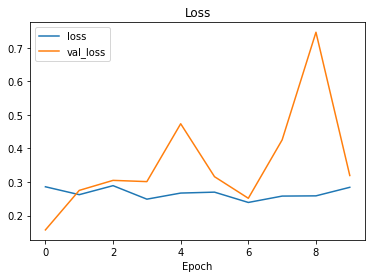

In [62]:
# Avaliação do treinamento a partir da curva de perda.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

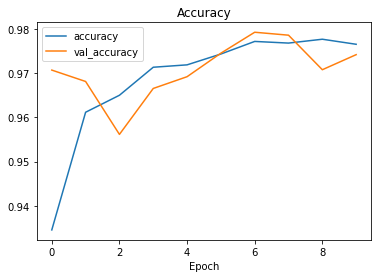

In [63]:
# Avaliação do treinamento a partir da curva de acuracia.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')

<Response [200]>


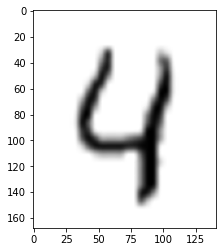

In [64]:

url = 'https://www.classes.cs.uchicago.edu/archive/2015/spring/12300-1/digit.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img, cmap='gray')

(28, 28)


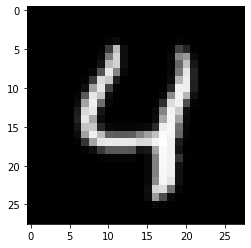

In [65]:

img_array = np.asarray(img)

resized = cv2.resize(img_array, (28,28))
# Caso a imagem orginal seja colorida usar a seguinte conversão para tons de cinza 
#gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
gray_scale = resized 
image = cv2.bitwise_not(gray_scale)
print(gray_scale.shape)
plt.imshow(image,cmap=plt.get_cmap("gray") )

In [66]:
#predição e verificação do score.
image = image/255
image = image.reshape(1,28,28,1)

prediction = model.predict_classes(image)
print("Digito previsto:", str(prediction))

prediction = model.predict(image)
print("Previsão para cada classe (número):", str(prediction))

score = model.evaluate(X_test, y_test, verbose=1)
print(type(score))
print('Erro de teste (loss):',score[0])
print('Precisão para os dados de teste:',score[1])



Digito previsto: [4]
Previsão para cada classe (número): [[2.5424006e-31 0.0000000e+00 1.2117092e-30 0.0000000e+00 1.0000000e+00
  1.2259097e-35 0.0000000e+00 1.5628675e-29 0.0000000e+00 1.6040373e-13]]
313/313 [==============================] - 2s 6ms/step - loss: 0.3499 - accuracy: 0.9749
<class 'list'>
Erro de teste (loss): 0.34994903206825256
Precisão para os dados de teste: 0.9749000072479248
